In [1]:
# --- Celda 1: Imports y carga del dataset final ---
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Ruta base del proyecto
BASE = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
PROC = BASE / "data" / "processed"

# Carga del dataset ya enriquecido y limpio
df = pd.read_csv(PROC / "olist_final_dataset.csv", parse_dates=[
    "shipping_limit_date",
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
], dtype={
    "order_id": "string",
    "product_id": "string",
    "seller_id": "string",
    "customer_id": "string",
    "order_status": "category",
    "order_status_simple": "category",
    "order_item_id": "int16",
    "is_late": "Int8"
})

print(df.shape)
df.head(3)

(50000, 34)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,...,purchase_weekday,purchase_hour,total_price,order_status_simple,order_line_uid,region,population,poverty,demographic_density,gdp_per_capita
0,f4ee4273538924bda6212f5948e80fde,1,69455f41626a745aea9ee9164cb9eafd,7d13fca15225358621be4086e1eb0964,2018-06-19 09:18:15,180.00,20.45,delivered,2018-06-12 08:59:54,2018-06-12 09:18:15,...,1,8,200.45,delivered,f4ee4273538924bda6212f5948e80fde-1,Southeast,45919049,0.027,184.99,0.001024
1,056349f85a73d794119c4286c95a52de,1,af35be35db4ad0dc288b571453337376,d20b021d3efdf267a402c402a48ea64b,2017-03-09 14:35:09,10.99,16.05,delivered,2017-03-03 14:21:58,2017-03-03 14:35:09,...,4,14,27.04,delivered,056349f85a73d794119c4286c95a52de-1,Southeast,45919049,0.027,184.99,0.001024
2,b124967afcc82ef17ec41020fe2a9136,1,12e6d0f655986ceff00c74658dec97b1,3be634553519fb6536a03e1358e9fdc7,2018-06-06 17:18:09,49.99,8.88,delivered,2018-05-29 16:19:32,2018-05-29 17:18:09,...,1,16,58.87,delivered,b124967afcc82ef17ec41020fe2a9136-1,Southeast,45919049,0.027,184.99,0.001024


In [2]:
# --- Celda 2: Validación rápida ---
# Verificamos tipos y nulos para este análisis
display(df.info())
display(df.describe(include=[np.number]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       50000 non-null  string        
 1   order_item_id                  50000 non-null  int16         
 2   product_id                     50000 non-null  string        
 3   seller_id                      50000 non-null  string        
 4   shipping_limit_date            50000 non-null  datetime64[ns]
 5   price                          50000 non-null  float64       
 6   freight_value                  50000 non-null  float64       
 7   order_status                   50000 non-null  category      
 8   order_purchase_timestamp       50000 non-null  datetime64[ns]
 9   order_approved_at              49994 non-null  datetime64[ns]
 10  order_delivered_carrier_date   49504 non-null  datetime64[ns]
 11  order_delivered

None

,order_item_id,price,freight_value,delivery_time_days,delay_vs_estimated_days,is_late,shipping_days_limit,purchase_year,purchase_month,purchase_day,purchase_weekday,purchase_hour,total_price,population,poverty,demographic_density,gdp_per_capita
count,50000.000000,50000.000000,50000.000000,48934.000000,48934.000000,50000.0,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,1.196980,121.291582,20.026346,12.415805,-11.140945,0.07542,6.485740,2017.542520,6.02236,15.553280,2.750360,14.725760,141.317928,3.685659e+07,0.031573,165.077872,0.001747
std,0.705825,191.007539,16.034451,9.543549,10.240287,0.26407,8.732099,0.504576,3.22554,8.662578,1.962977,5.326278,198.313246,1.472271e+07,0.021633,81.724258,0.002552
min,1.000000,0.850000,0.000000,1.000000,-146.000000,0.0,2.000000,2016.000000,1.00000,1.000000,0.000000,0.000000,6.080000,8.819350e+05,0.017000,2.660000,0.001024
25%,1.000000,39.900000,13.040000,7.000000,-16.000000,0.0,5.000000,2017.000000,3.00000,8.000000,1.000000,11.000000,55.217500,2.116879e+07,0.027000,184.990000,0.001024
50%,1.000000,74.900000,16.250000,10.000000,-12.000000,0.0,6.000000,2018.000000,6.00000,16.000000,3.000000,15.000000,92.195000,4.591905e+07,0.027000,184.990000,0.001024
75%,1.000000,134.990000,21.150000,16.000000,-6.000000,0.0,7.000000,2018.000000,8.00000,23.000000,4.000000,19.000000,158.130000,4.591905e+07,0.027000,184.990000,0.001289
max,20.000000,6735.000000,409.680000,210.000000,189.000000,1.0,1056.000000,2018.000000,12.00000,31.000000,6.000000,23.000000,6929.310000,4.591905e+07,0.263000,523.410000,0.026698


In [3]:
# --- Celda 3: Test 1 - Comparación delivery_time (1 línea vs múltiples líneas) ---
# Hipótesis: los pedidos con múltiples líneas tardan más en promedio
df_orderlines = df.groupby("order_id").size().reset_index(name="n_lines")
df_merged = df.merge(df_orderlines, on="order_id")

single_line = df_merged.loc[df_merged["n_lines"] == 1, "delivery_time_days"].dropna()
multi_line  = df_merged.loc[df_merged["n_lines"] > 1, "delivery_time_days"].dropna()

# t-test
t_stat, p_val = stats.ttest_ind(single_line, multi_line, equal_var=False)

print("Media single line:", single_line.mean())
print("Media multi line:", multi_line.mean())
print("t-test stat:", t_stat, "p-val:", p_val)


Media single line: 12.472424460933684
Media multi line: 12.006225811879522
t-test stat: 3.466365850013089 p-val: 0.0005304651871195946


Media:
 price                      121.291582
freight_value               20.026346
total_price                141.317928
delivery_time_days          12.415805
delay_vs_estimated_days    -11.140945
shipping_days_limit          6.485740
dtype: float64

Mediana:
 price                      74.900
freight_value              16.250
total_price                92.195
delivery_time_days         10.000
delay_vs_estimated_days   -12.000
shipping_days_limit         6.000
dtype: float64

Desviación estándar:
 price                      191.007539
freight_value               16.034451
total_price                198.313246
delivery_time_days           9.543549
delay_vs_estimated_days     10.240287
shipping_days_limit          8.732099
dtype: float64

Percentiles (25%, 50%, 75%):
        price  freight_value  total_price  delivery_time_days  \
0.25   39.90          13.04      55.2175                 7.0   
0.50   74.90          16.25      92.1950                10.0   
0.75  134.99          21.15   

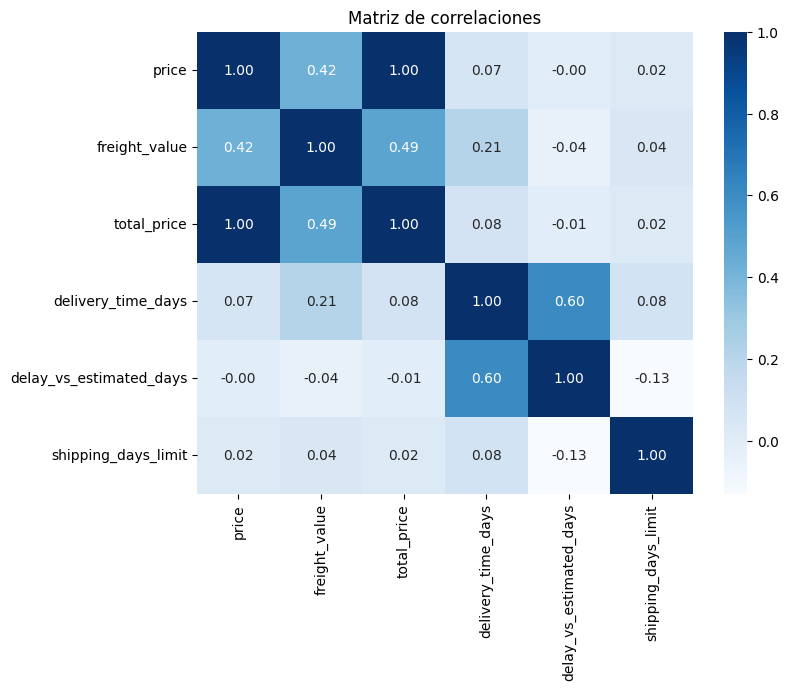

In [4]:
# --- Celda 3: Estadísticas generales adicionales ---

# Seleccionamos columnas numéricas relevantes para KPIs
num_cols = [
    "price", "freight_value", "total_price",
    "delivery_time_days", "delay_vs_estimated_days",
    "shipping_days_limit"
]

# Estadísticas básicas
print("Media:\n", df[num_cols].mean(numeric_only=True))
print("\nMediana:\n", df[num_cols].median(numeric_only=True))
print("\nDesviación estándar:\n", df[num_cols].std(numeric_only=True))
print("\nPercentiles (25%, 50%, 75%):\n", df[num_cols].quantile([0.25, 0.5, 0.75]))

# Correlación entre esas variables
print("\nCorrelaciones específicas:\n", df[num_cols].corr(numeric_only=True))

# Visualización opcional de la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

In [5]:
# --- Celda 4: Test 2 - Puntualidad sellers top vs resto ---
# Hipótesis: los top 10 sellers tienen mejor puntualidad
top_sellers = (df.groupby("seller_id")["total_price"].sum()
                 .sort_values(ascending=False)
                 .head(10).index)

df["seller_group"] = np.where(df["seller_id"].isin(top_sellers), "Top10", "Others")

contingency = pd.crosstab(df["seller_group"], df["is_late"])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

print("Contingency:\n", contingency)
print("Chi2:", chi2, "p-val:", p_val)


Contingency:
 is_late           0     1
seller_group             
Others        41580  3303
Top10          4649   468
Chi2: 20.776146967672567 p-val: 5.16219280116785e-06


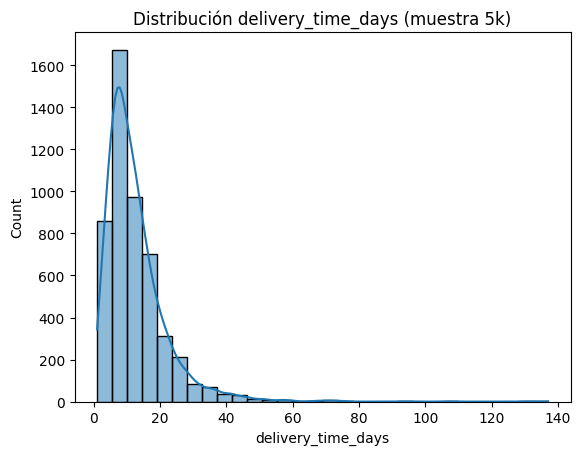

Shapiro-Wilk stat: 0.793774172913499 p-val: 3.608006191495857e-62


In [6]:
# --- Celda 5: Normalidad y distribución delivery_time_days ---
# Shapiro-Wilk test sobre una muestra (por performance)
sample = df["delivery_time_days"].dropna().sample(5000, random_state=42)

shapiro_stat, shapiro_p = stats.shapiro(sample)

plt.figure()
sns.histplot(sample, kde=True, bins=30)
plt.title("Distribución delivery_time_days (muestra 5k)")
plt.show()

print("Shapiro-Wilk stat:", shapiro_stat, "p-val:", shapiro_p)


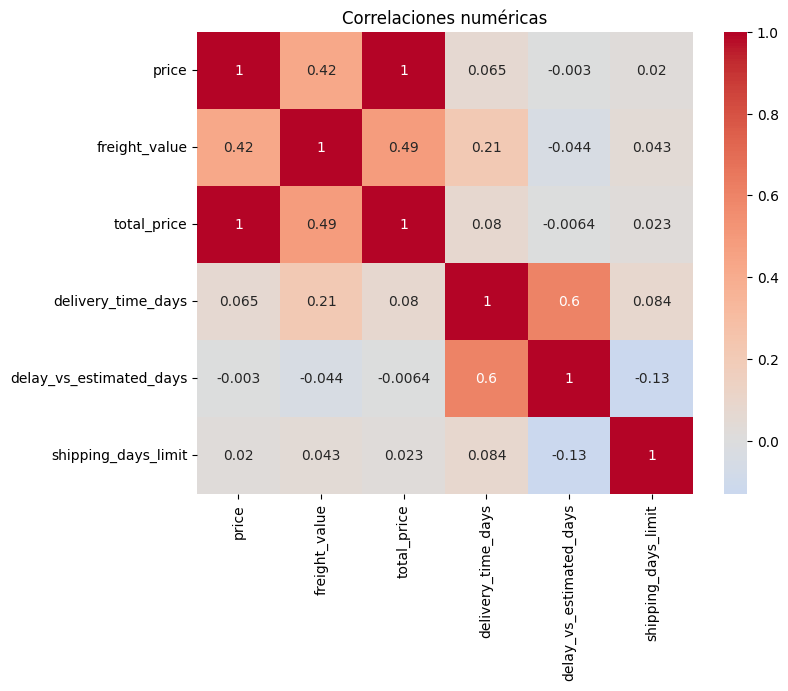

In [7]:
# --- Celda 6: Correlaciones ---
# Exploramos correlaciones entre numéricas relevantes
num_cols = ["price","freight_value","total_price","delivery_time_days","delay_vs_estimated_days","shipping_days_limit"]
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlaciones numéricas")
plt.show()


In [8]:
# --- Celda 7: Export resultados clave ---
OUT = PROC / "stats"
OUT.mkdir(parents=True, exist_ok=True)

# Guardar tablas o resúmenes útiles
contingency.to_csv(OUT / "contingency_seller_on_time.csv")
corr.to_csv(OUT / "correlation_matrix.csv")

"guardado"


'guardado'